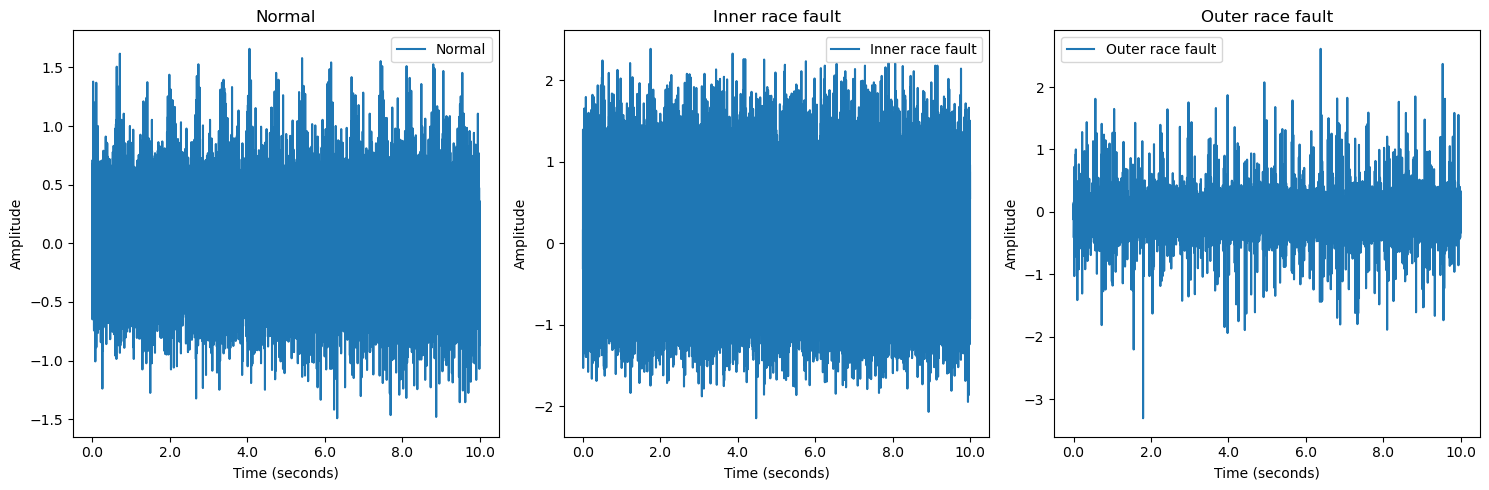

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

file1 = "C:/Users/ns-dhamne/Data Acquisition/ProcessedData/Normal/N01.csv"
file2 = "C:/Users/ns-dhamne/Data Acquisition/ProcessedData/Innerrace/I01.csv"
file3 = "C:/Users/ns-dhamne/Data Acquisition/ProcessedData/Outerrace/O01.csv"
df1 = pd.read_csv(file1)
df2 = pd.read_csv(file2)
df3 = pd.read_csv(file3)

x_ticks = np.linspace(0, 10, num=6)
x_data_ticks = np.linspace(0, 12000, num=len(x_ticks)) 
x_tick_labels = [f'{t:.1f}' for t in x_ticks]

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # Grid with 1 row and 3 columns

# Plot for file 1
axes[0].plot(df1, label='Normal')
axes[0].set_title('Normal')
axes[0].set_xlabel('Time (seconds)')
axes[0].set_ylabel('Amplitude')
axes[0].set_xticks(x_data_ticks)
axes[0].set_xticklabels(x_tick_labels)
axes[0].legend()

# Plot for file 2
axes[1].plot(df2, label='Inner race fault')
axes[1].set_title('Inner race fault')
axes[1].set_xlabel('Time (seconds)')
axes[1].set_ylabel('Amplitude')
axes[1].set_xticks(x_data_ticks)
axes[1].set_xticklabels(x_tick_labels)
axes[1].legend()

# Plot for file 3
axes[2].plot(df3, label='Outer race fault')
axes[2].set_title('Outer race fault')
axes[2].set_xlabel('Time (seconds)')
axes[2].set_ylabel('Amplitude')
axes[2].set_xticks(x_data_ticks)
axes[2].set_xticklabels(x_tick_labels)
axes[2].legend()

plt.tight_layout()
plt.show()

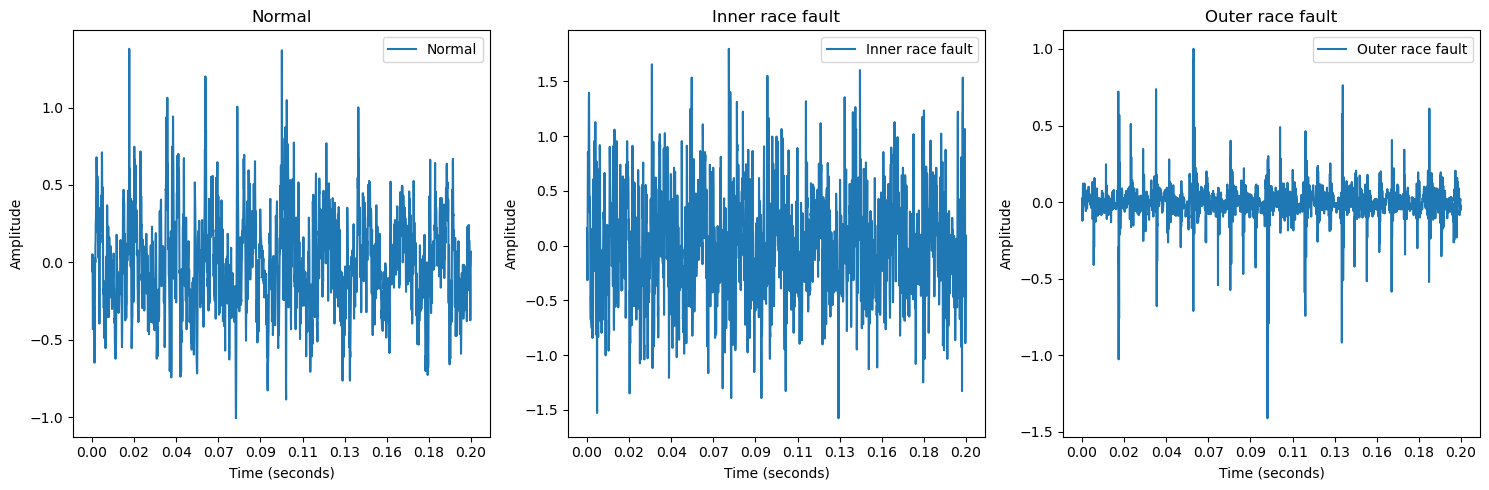

In [10]:
x_ticks = np.linspace(0, 0.2, num=10)
x_data_ticks = np.linspace(0, 2400, num=len(x_ticks)) 
x_tick_labels = [f'{t:.2f}' for t in x_ticks]

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # Grid with 1 row and 3 columns

# Plot for file 1
axes[0].plot(df1[:2400], label='Normal')
axes[0].set_title('Normal')
axes[0].set_xlabel('Time (seconds)')
axes[0].set_ylabel('Amplitude')
axes[0].set_xticks(x_data_ticks)
axes[0].set_xticklabels(x_tick_labels)
axes[0].legend()

# Plot for file 2
axes[1].plot(df2[:2400], label='Inner race fault')
axes[1].set_title('Inner race fault')
axes[1].set_xlabel('Time (seconds)')
axes[1].set_ylabel('Amplitude')
axes[1].set_xticks(x_data_ticks)
axes[1].set_xticklabels(x_tick_labels)
axes[1].legend()

# Plot for file 3
axes[2].plot(df3[:2400], label='Outer race fault')
axes[2].set_title('Outer race fault')
axes[2].set_xlabel('Time (seconds)')
axes[2].set_ylabel('Amplitude')
axes[2].set_xticks(x_data_ticks)
axes[2].set_xticklabels(x_tick_labels)
axes[2].legend()

plt.tight_layout()
plt.show()

C:\Users\ns-dhamne\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


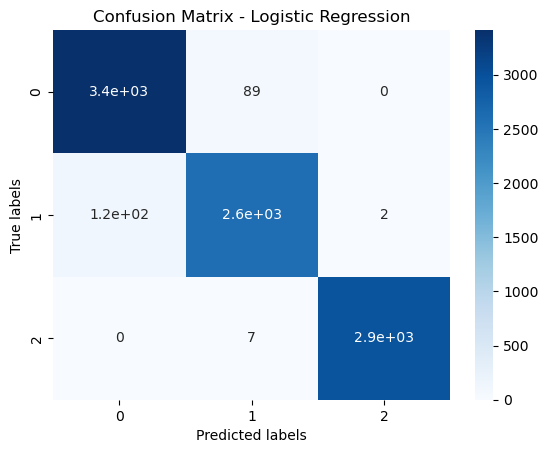

Classification Report: Logistic Regression
              precision    recall  f1-score   support

   InnerRace       0.97      0.97      0.97      3501
      Normal       0.96      0.95      0.96      2719
   Outerrace       1.00      1.00      1.00      2944

    accuracy                           0.98      9164
   macro avg       0.98      0.98      0.98      9164
weighted avg       0.98      0.98      0.98      9164

Execution time: 9.4747 seconds


In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import time

# Load the dataset
data = pd.read_csv('C:/Users/ns-dhamne/Data Acquisition/ProcessedData/stats/data.csv')

# Split the dataset into features (X) and target variable (y)
X = data.drop(columns=['Condition'])
y = data['Condition']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize logistic regression model
model = LogisticRegression(max_iter=1000)

# Train the model
start_time = time.time()
model.fit(X_train, y_train)
end_time = time.time()
execution_time = end_time - start_time

# Predict the test set labels
y_pred = model.predict(X_test)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using seaborn
sns.heatmap(conf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

# Print classification report
print("Classification Report: Logistic Regression")
print(classification_report(y_test, y_pred))

# Print execution time
print(f"Execution time: {execution_time:.4f} seconds")

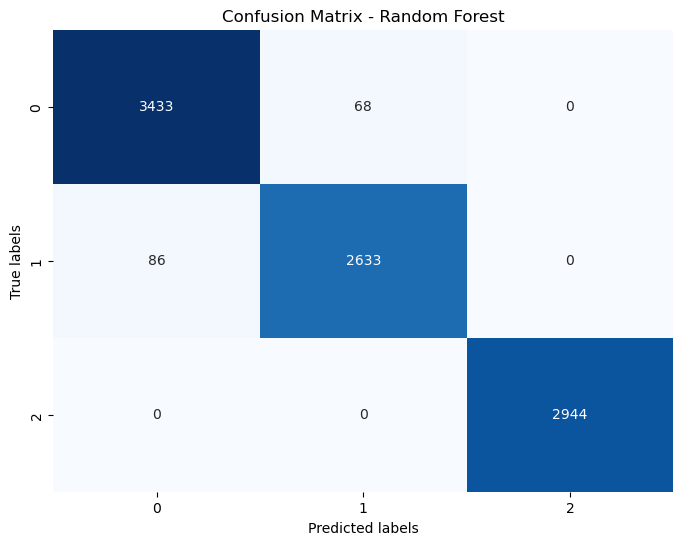

Random Forest - Classification Report:
              precision    recall  f1-score   support

   InnerRace       0.98      0.98      0.98      3501
      Normal       0.97      0.97      0.97      2719
   Outerrace       1.00      1.00      1.00      2944

    accuracy                           0.98      9164
   macro avg       0.98      0.98      0.98      9164
weighted avg       0.98      0.98      0.98      9164

Random Forest - Execution time: 8.5358 seconds


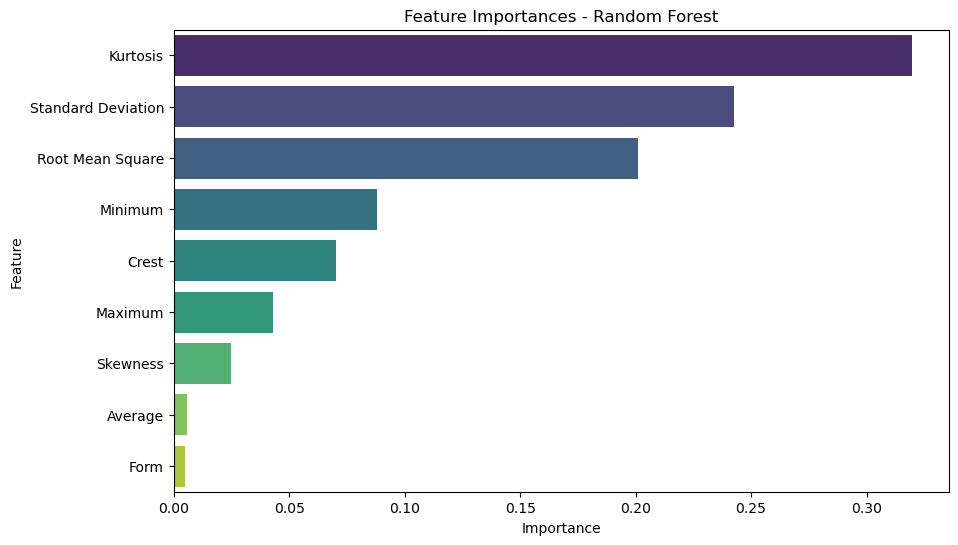

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
import time
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('C:/Users/ns-dhamne/Data Acquisition/ProcessedData/stats/data.csv')

# Split the dataset into features (X) and target variable (y)
X = data.drop(columns=['Condition'])
y = data['Condition']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest classifier with class weights
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)

# Train the Random Forest model
start_time_rf = time.time()
rf_model.fit(X_train, y_train)
end_time_rf = time.time()
execution_time_rf = end_time_rf - start_time_rf

# Predict the test set labels using Random Forest
y_pred_rf = rf_model.predict(X_test)

# Calculate confusion matrix for Random Forest
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Random Forest')
plt.show()

# Print classification report for Random Forest
print("Random Forest - Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Print execution time for Random Forest
print(f"Random Forest - Execution time: {execution_time_rf:.4f} seconds")

# Get feature importances from Random Forest model
feature_importances = rf_model.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances - Random Forest')
plt.show()